## Data Description

11 inputs & 1 output
total 12 columns and the last one(quality) is the y value

#of samples
red: 1599
white: 4898

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import seaborn as sns #for visualization

In [3]:
pd.__version__

'0.25.3'

## Create Functions

In [4]:
def plot_all_columns(df):
    # 3x4 subplots
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    # initialize i and j
    i = j = 0
    # plot for all columns
    for c in df.iloc[:, :-1]:
        axes[i, j].scatter(df[c], df['quality'])
        axes[i, j].set_title(c)
        j += 1
        if j > 3:
            j = 0
            i += 1
    plt.show()

In [6]:
def corr_rp(matrix):
    # get shape
    rows, cols = matrix.shape[0], matrix.shape[1]
    # initialize corr matrices with 1
    # initialize p-value matrices with 0
    np.set_printoptions(suppress=True) #added
    r = np.ones(shape=(cols, cols))
    p = np.zeros(shape=(cols, cols))
    # get pearson correlation matrix and the p-value
    for i in range(cols):
        for j in range(i+1, cols):
            r_, p_ = pearsonr(matrix[:, i], matrix[:, j])
            r[i, j] = r[j, i] = r_
            p[i, j] = p[j, i] = p_
    return r, p

## Load Data

In [8]:
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

check if the data has driven correctly

In [9]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
# select red, white, or red & white
# wine_df = red_wine_df  // so this is for the red wine
# wine_df = white_wine_df // this is for the white one
# wine_df = pd.concat([red_wine_df, white_wine_df]) // and this is for both as "wine"

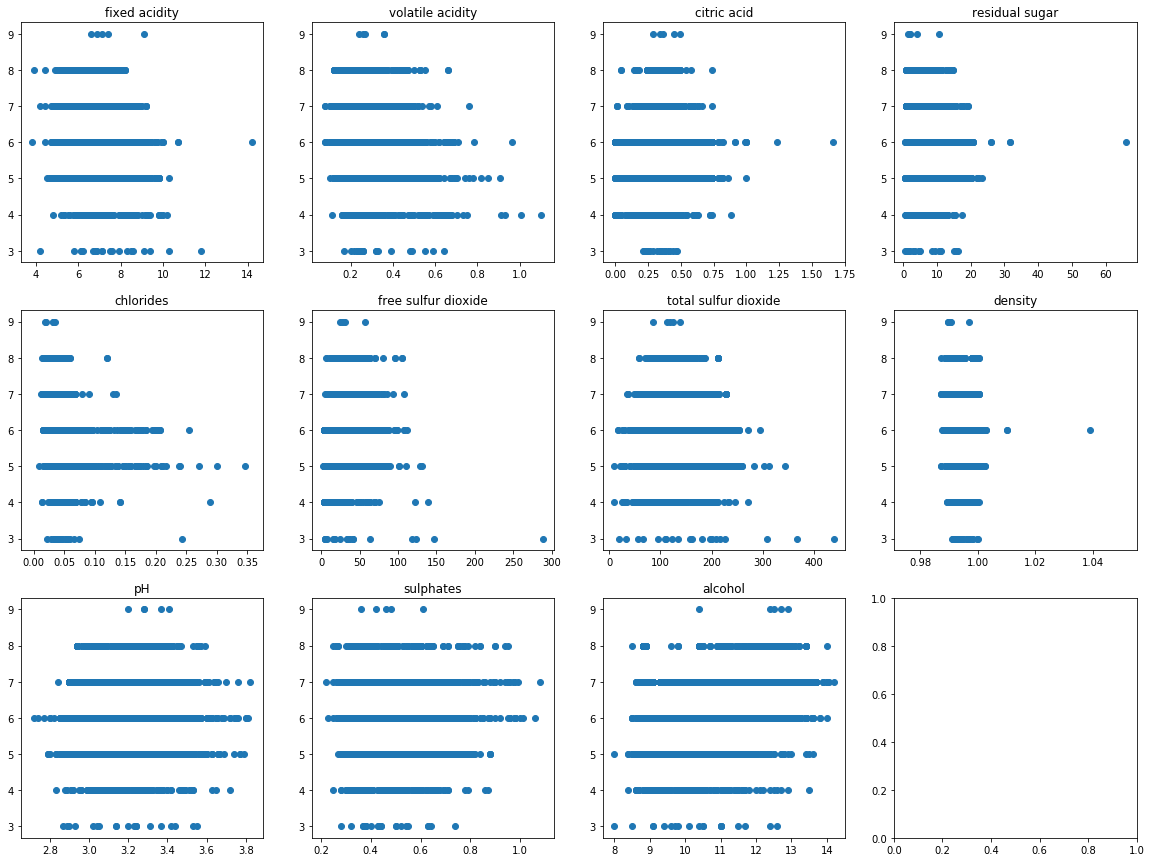

In [12]:
plot_all_columns(white_df)

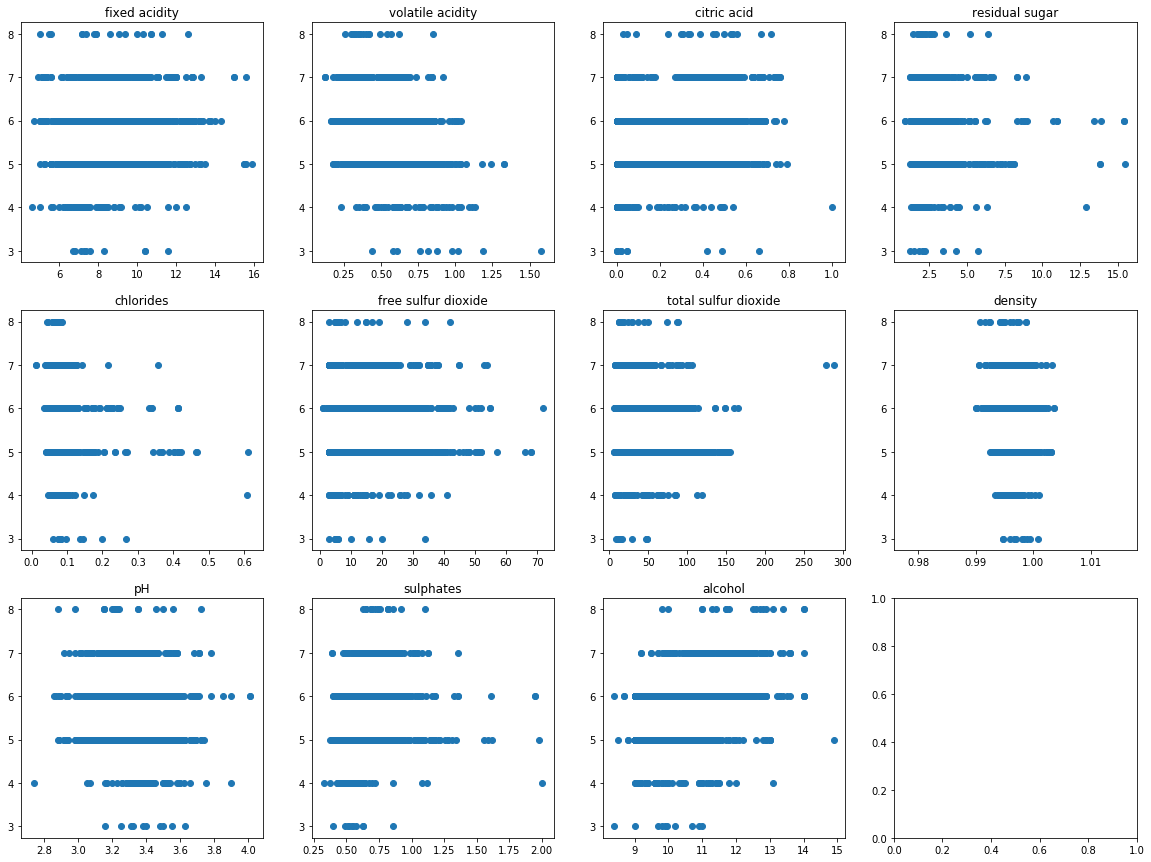

In [13]:
plot_all_columns(red_df)

## Split the data into Training & Test sets

In [14]:
# Make a train/test split using 30% test size
#wine_train, wine_test = train_test_split(wine_df, test_size=0.30, random_state=0)

>> why not seperte the target(y) from inputs(x)??
X = wine_df.drop(columns='quality')
y = wine_df['quality']

    ==> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

- White Wine

In [15]:
white_train, white_test = train_test_split(white_df, test_size=0.30, random_state=0)

In [16]:
white_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
196,6.4,0.29,0.44,3.6,0.197,75.0,183.0,0.99420,3.01,0.38,9.1,5
4552,6.4,0.55,0.26,9.6,0.027,20.0,104.0,0.99240,3.22,0.73,13.1,6
133,6.6,0.24,0.27,15.8,0.035,46.0,188.0,0.99820,3.24,0.51,9.2,5
2517,7.3,0.51,0.29,11.3,0.034,61.0,224.0,0.99683,3.14,0.56,9.5,6
3034,6.9,0.25,0.47,8.4,0.042,36.0,156.0,0.99604,3.15,0.55,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4859,6.0,0.43,0.34,7.6,0.045,25.0,118.0,0.99222,3.03,0.37,11.0,6
3264,5.9,0.24,0.12,1.4,0.035,60.0,247.0,0.99358,3.34,0.44,9.6,6
1653,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2607,8.9,0.26,0.33,8.1,0.024,47.0,202.0,0.99558,3.13,0.46,10.8,6


In [17]:
white_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2762,7.3,0.32,0.35,1.40,0.050,8.0,163.0,0.99244,3.24,0.42,10.7,5
42,7.0,0.31,0.26,7.40,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
1419,7.6,0.14,0.74,1.60,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7
3664,5.0,0.29,0.54,5.70,0.035,54.0,155.0,0.98976,3.27,0.34,12.9,8
2125,6.0,0.28,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
934,6.2,0.28,0.43,13.00,0.039,64.0,233.0,0.99745,3.08,0.38,8.9,5
2803,5.5,0.15,0.32,14.00,0.031,16.0,99.0,0.99437,3.26,0.38,11.5,8
3364,6.0,0.20,0.26,1.10,0.033,38.0,67.0,0.98954,3.14,0.38,11.5,6
3870,6.1,0.23,0.27,9.80,0.055,74.0,134.0,0.99534,3.16,0.40,10.2,6


total 4898 rows
train 70% (3428)
test 30% (1470)

- Red Wine

In [18]:
red_train, red_test = train_test_split(red_df, test_size=0.30, random_state=0)

## Pearson Correlation Coefficient (PCC)

In [ ]:
# get pearson correlation matrix and the two-tailed p-value for hypothesis testing
# r is the correlation matrix and p is the p-value matrix
# print out 12th column of each matrix, which is about target variable
# you may use the entire matrix, i.e. r and p, for plotting

In [19]:
pd.__version__

'0.25.3'

- White Wine

In [20]:
white_train.values

array([[ 6.4 ,  0.29,  0.44, ...,  0.38,  9.1 ,  5.  ],
       [ 6.4 ,  0.55,  0.26, ...,  0.73, 13.1 ,  6.  ],
       [ 6.6 ,  0.24,  0.27, ...,  0.51,  9.2 ,  5.  ],
       ...,
       [ 7.9 ,  0.33,  0.28, ...,  0.38,  8.8 ,  6.  ],
       [ 8.9 ,  0.26,  0.33, ...,  0.46, 10.8 ,  6.  ],
       [ 7.9 ,  0.51,  0.34, ...,  0.51, 10.  ,  5.  ]])

In [26]:
white_r, white_p = corr_rp(white_train.values)

In [33]:
white_r

array([[ 1.      , -0.028057,  0.278573,  0.099261,  0.02136 , -0.042899,
         0.105177,  0.276138, -0.423198, -0.017007, -0.12886 , -0.110258],
       [-0.028057,  1.      , -0.147809,  0.040498,  0.080744, -0.113654,
         0.079233,  0.006187, -0.028584, -0.03128 ,  0.05643 , -0.201817],
       [ 0.278573, -0.147809,  1.      ,  0.082575,  0.122474,  0.095567,
         0.11394 ,  0.135539, -0.149425,  0.0629  , -0.069846, -0.00936 ],
       [ 0.099261,  0.040498,  0.082575,  1.      ,  0.081571,  0.305851,
         0.415113,  0.837824, -0.200508, -0.032971, -0.470652, -0.10514 ],
       [ 0.02136 ,  0.080744,  0.122474,  0.081571,  1.      ,  0.099699,
         0.203535,  0.252871, -0.090727,  0.022351, -0.356988, -0.219074],
       [-0.042899, -0.113654,  0.095567,  0.305851,  0.099699,  1.      ,
         0.61247 ,  0.307578,  0.000731,  0.068166, -0.251126,  0.031551],
       [ 0.105177,  0.079233,  0.11394 ,  0.415113,  0.203535,  0.61247 ,
         1.      ,  0.55209 , -0

In [36]:
%precision 6
white_r[11]

array([-0.110258, -0.201817, -0.00936 , -0.10514 , -0.219074,  0.031551,
       -0.173344, -0.316524,  0.103718,  0.056774,  0.440793,  1.      ])

In [37]:
white_p[11]

array([0.      , 0.      , 0.583827, 0.      , 0.      , 0.064741,
       0.      , 0.      , 0.      , 0.000882, 0.      , 0.      ])

NameError: name 'corr' is not defined

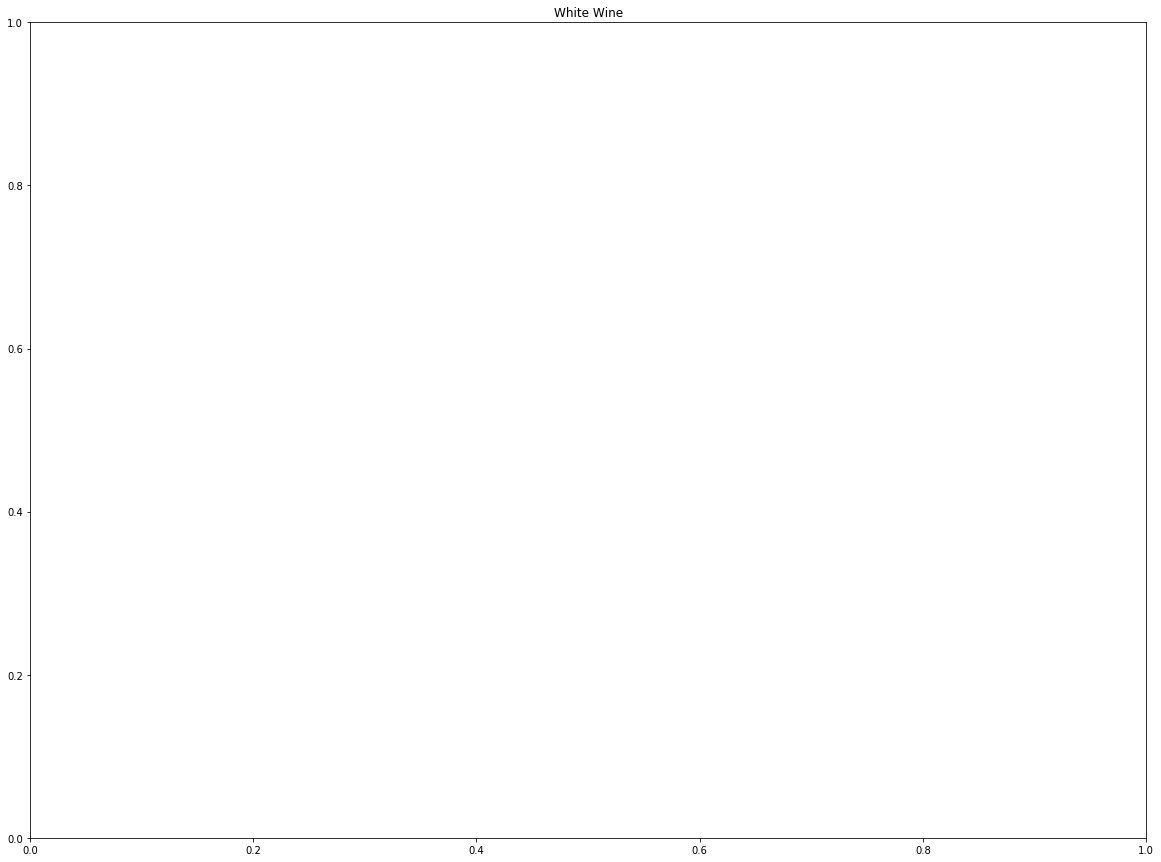

In [31]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("White Wine")
ax.set_ylim(len(white_r)-0.5, -0.5)
sns.heatmap(white_r, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu", annot=True)
plt.show()

==> alcohol, density, chlorides

check p-value
0, 0, 0
all less than 0.05 => Related

- Red Wine

In [ ]:
red_r, red_p = corr_rp(red_train.values)

In [ ]:
red_r[11]

In [ ]:
red_p[11]

In [ ]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Red Wine")
sns.heatmap(red_r, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlOrRd", annot=True)
plt.show()

==> alcohol, volatile acidity, sulphates

check p-value
0, 0, 0
all less than 0.05 => Related

In [ ]:
# scale predictors by its standard deviation
wine_train_pred = wine_train.iloc[:, :-1]
wine_train_target = wine_train.iloc[:, -1]
std_scaler = StandardScaler()
fitted = std_scaler.fit(wine_train_pred)
scaled_pred = pd.DataFrame(std_scaler.transform(wine_train_pred),
                           columns=wine_train_pred.columns,
                           index=list(wine_train_pred.index.values))

## Re-scaling (Standarization)

- White Wine

In [ ]:
white_train_pred = white_train.iloc[:, :-1]
white_train_target = white_train.iloc[:, -1]
std_scaler = StandardScaler()
white_fitted = std_scaler.fit(white_train_pred)
white_scaled_pred = pd.DataFrame(std_scaler.transform(white_train_pred),
                           columns=white_train_pred.columns,
                           index=list(white_train_pred.index.values))

- Red Wine

In [ ]:
red_train_pred = red_train.iloc[:, :-1]
red_train_target = red_train.iloc[:, -1]
std_scaler = StandardScaler()
red_fitted = std_scaler.fit(red_train_pred)
red_scaled_pred = pd.DataFrame(std_scaler.transform(red_train_pred),
                           columns=red_train_pred.columns,
                           index=list(red_train_pred.index.values))

## PCA ?? 

>>>needs further details...

- White Wine

In [ ]:
pca = PCA(n_components=2)
white_pc = pca.fit_transform(white_train_pred)
white_principal_df = pd.DataFrame(data=white_pc, columns=['principal component 1', 'principal component 2'],
                            index=list(white_train_pred.index.values))
white_final_df = pd.concat([white_principal_df, white_train_target], axis=1)

In [ ]:
# display PCA projection to 2D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('White Wine', fontsize=15)
for qual in range(1, 11):
    logical_inx = white_final_df['quality'] == qual
    color = ""
    if qual <= 4:
        color = "#FF0000"
    elif qual == 5:
        color = ""
    elif qual >= 7:
        color = "#0000FF"
    sc = ax.scatter(white_final_df.loc[logical_inx, 'principal component 1'],
                    white_final_df.loc[logical_inx, 'principal component 2'],
                    edgecolors=color,
                    facecolors='none',
                    s=35)
ax.grid()
plt.show()

- Red Wine

In [ ]:
pca = PCA(n_components=2)
red_pc = pca.fit_transform(red_train_pred)
red_principal_df = pd.DataFrame(data=red_pc, columns=['principal component 1', 'principal component 2'],
                            index=list(red_train_pred.index.values))
red_final_df = pd.concat([red_principal_df, red_train_target], axis=1)

In [ ]:
# display PCA projection to 2D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_title('White Wine', fontsize=15)
for qual in range(1, 11):
    logical_inx = red_final_df['quality'] == qual
    color = ""
    if qual <= 4:
        color = "#FF0000"
    elif qual == 5:
        color = ""
    elif qual >= 7:
        color = "#0000FF"
    sc = ax.scatter(red_final_df.loc[logical_inx, 'principal component 1'],
                    red_final_df.loc[logical_inx, 'principal component 2'],
                    edgecolors=color,
                    facecolors='none',
                    s=35)
ax.grid()
plt.show()

In [ ]:
# PCA projection to 11D (full principal components)
pca_full = PCA(n_components=11)
principalComponents = pca_full.fit_transform(wine_train_pred)
principal_df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2',
                                                               'principal component 3', 'principal component 4',
                                                               'principal component 5', 'principal component 6',
                                                               'principal component 7', 'principal component 8',
                                                               'principal component 9', 'principal component 10',
                                                               'principal component 11'],
                            index=list(wine_train_pred.index.values))
final_df = pd.concat([principal_df, wine_train_target], axis=1)

In [ ]:
# print out POV of all principal components
print('Proportion of Variance Explained : ', pca_full.explained_variance_ratio_)

In [ ]:
# print out all principal components and its weights
print(pd.DataFrame(pca_full.components_, columns=wine_train_pred.columns,
                   index=['PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10', 'PC-11']))